In [1]:
master_path ='..\..\Raw_Data\\Bioreactor_Data\\GAuDi'

In [7]:
from lib.tools import *

In [3]:
def gaudi_mpc(data, t_shift =0,t_del = []):
    name = data.preculture.strain_name
    df_LEDs = data.data_to_df('LEDs')
    df_ODs = data.data_to_df('ODs')
    n_events = 5000
    thresh_af_r = 100
    thresh_af_g = 100
    thresh_fp = [10, 200,50,200]
    sz = 30
    fps = ['mCerulean','GRN-B-HLin','mVenus','ORG-G-HLin','SSC-HLin']
    gk = data.cells.groupby('rel_time_hrs')
    t= np.unique(np.array(data.cells['rel_time_hrs']))
    t_del = sorted(t_del, reverse=True)
    t = np.delete(t,t_del)
    rec_frac_count = np.zeros(np.size(t),dtype=float)
    
    duty_effective = data.compute_LED_duty_fraction_traj(min_duration_cycle_s=1800)
        
    for jj in range(0,np.size(t)):
            lk = gk.get_group(t[jj])
            if (lk.size)/26 < n_events/100:
                print('Wear shirts  next time')
            else:
                sz_lk = lk.loc[(lk['gating-metric'] >= thresh1)]
                dbf_lk = sz_lk.loc[(sz_lk['doublet-metric'] <= thresh2)]
                db_lk = dbf_lk.loc[(dbf_lk[fps[3]] > thresh_af_r) |(dbf_lk[fps[1]] > thresh_af_g) ]
                rec_frac_count[jj] = db_lk.loc[(((db_lk[fps[3]]/db_lk[fps[4]])*np.mean(db_lk[fps[4]]))>thresh_fp[3])][fps[1]].count()/db_lk[fps[1]].count()
    
    return(t-t_shift,rec_frac_count,duty_effective)

In [4]:
t=[x[1] for x in os.walk(master_path)]
basepath = os.path.join(master_path,'2020-12-11')
basepath = os.path.join(basepath,t[1][0])
print(basepath)
all_data6 = {}
reactors = [1,6]
for rid in reactors:
        print(rid)
        all_data6[rid] = ReactorData(f'{basepath}/reactor-{rid}')
        all_data6[rid].cells = do_gating(all_data6[rid])
        all_data6[rid].cells= deconvolve_turbi(all_data6[rid].cells,AF,FP_signatures)

..\..\Raw_Data\Bioreactor_Data\GAuDi\2020-12-11\reactor-data
1
done
6
done


In [5]:
t=[x[1] for x in os.walk(master_path)]
basepath = os.path.join(master_path,'2020-11-10')
basepath = os.path.join(basepath,t[1][0])
print(basepath)
all_data5 = {}
reactors = [1]
for rid in reactors:
        print(rid)
        all_data5[rid] = ReactorData(f'{basepath}/reactor-{rid}')
        all_data5[rid].cells = do_gating(all_data5[rid])
        all_data5[rid].cells= deconvolve_turbi(all_data5[rid].cells,AF,FP_signatures)

..\..\Raw_Data\Bioreactor_Data\GAuDi\2020-11-10\reactor-data
1
done


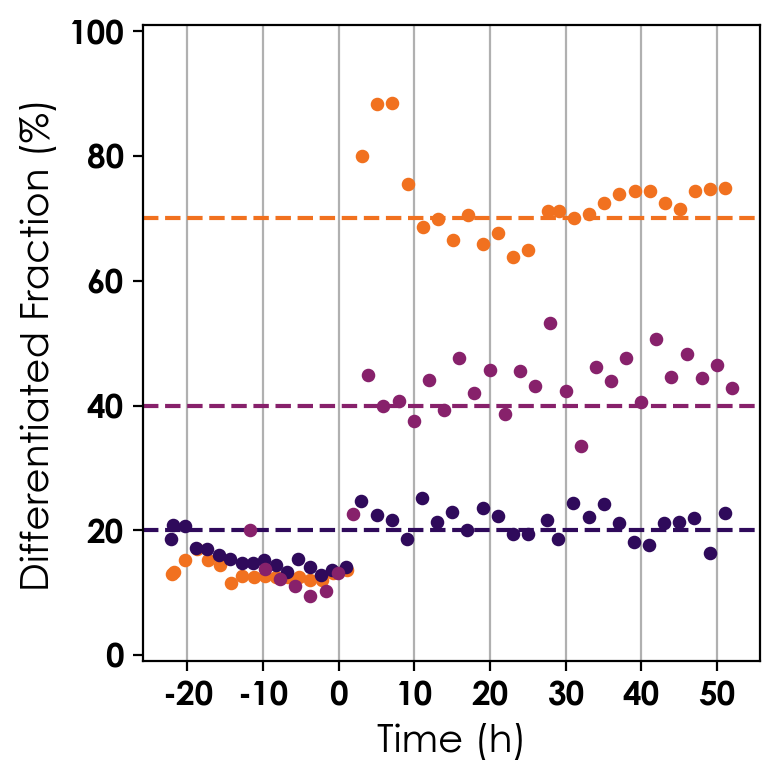

In [6]:
reactorss = [[1,6],[1]]

controlssg = [[70,20],[40]]

fs = 14
all_datas =[all_data6,all_data5]

t_shifts = [[30,30], [24]]
sz = 15
t_del1 =  [i for i in range(42,53)]

t_del2 = [i for i in range(0,5)] +[i for i in range(38,45)]

t_dels = [[t_del1,t_del1],[t_del2]]

tickls =['20','40','70']
evenly_spaced_interval = np.linspace(0, 1,20)
colori = [plt.cm.inferno(x) for x in evenly_spaced_interval]
colu = [3,7,13]
colors = {x:colori[y] for x,y in zip(tickls,colu)}
fig, (ax1) = plt.subplots(1,1,figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
count = 0
for zz,reactors in enumerate(reactorss):

    thresh1 = 0.05
    thresh2 = 0.95
    
    for jj,rid in enumerate(reactors):

        t,rec_fraction,_= gaudi_mpc(all_datas[zz][rid], t_shift = t_shifts[zz][jj],t_del = t_dels[zz][jj])
        ax1.scatter(t,rec_fraction*100,s =sz,color =colors[str(controlssg[zz][jj])],zorder =11000 )
        ax1.axhline(y= controlssg[zz][jj],color = colors[str(controlssg[zz][jj])],linestyle = '--')
        count+=1
ax1.set_ylim(-1,101)
ax1.set_title('',fontsize = fs+2,**cgfont)
xticks = [-20,-10,0,10,20,30,40,50]
yticks = [0,20,40,60,80,100]
ax1.set_ylabel('Differentiated Fraction (%)', fontsize=fs,**cgfont)
ax1.set_xlabel('Time (h)', fontsize=fs,**cgfont)

ax1.set_xticks(xticks) 
ax1.set_xticklabels([str(i) for i in xticks], fontsize=fs-2,**cgfont)
ax1.set_yticks(yticks) 
ax1.set_yticklabels([str(i) for i in yticks], fontsize=fs-2,**cgfont)
ax1.xaxis.grid(True)

plt.savefig('../plots' +'/Figure4e.eps',bbox_inches = 'tight')
plt.savefig('../plots' +'/Figure4e.png',bbox_inches = 'tight')
plt.savefig('../plots' +'/Figure4e.svg',bbox_inches = 'tight')

fig.tight_layout()
